## Fandago's Movie Ratings 

Hickey published this [article](https://www.fandango.com/) in 2015 which explains how [Fandago's](https://www.fandango.com/) movie's rating is largely bias. He noted that by their standard, it is quite impossible for a movie to perform poorly.

In this project, the aim is to analyze a new set of ratings from Fandango's site to check if changes have been made to remove the bias as promised by Fandago's officials.

[Here](https://github.com/fivethirtyeight/data/tree/master/fandango) is the link to the Github page that contains Hickey's analysis and [here](https://github.com/mircealex/Movie_ratings_2016_17) is a data for ratings released in 2016 and 2017.

In [1]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns

In [2]:
#reading the dataset
fandago_2015 = pd.read_csv('fandango_score_comparison.csv')
fandago_new = pd.read_csv('movie_ratings_16_17.csv')

#### Exploring the dataset

In [3]:
fandago_2015.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70           4.3         ...                3.90            3.5   
1     4.25           4.0         ...                3.55            4.5   
2     4.00           4.5         ...                3.90            4.0   
3     0.90           4.2         ...                2.70            1.0   
4     0.70           1.4         ...                2.55            0.5   

   RT_user_norm_round  Metacritic_norm_round  Metacritic_user_norm_round  \
0                 4.5                    3.5                         3.5   
1                 4.0                    3.5                         4.0   
2                 4.5                    3.0                         4.0   
3                 4.0                    1.0                         2.5   
4                 1.5                    1.5                         1.5   

   IMDB_norm_round  Metacritic_user_vote_count  IMDB_user_vote_count  \
0              4.0                        1330                271107   
1              3.5                         249                 65709   
2              4.0                         627                103660   
3              2.5                          31                  3136   
4              2.5                          88                 19560   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  

[5 rows x 22 columns]

In [4]:
fandago_new.head()

movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2        2.0          2.5  
3        1.5          4.0  
4        3.5          3.0

### Extracting columns of interest

For the 2015 dataset, going through the github page revealed that the parameters we required are; *'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'.* For the 2016/2017 analysis, they are; *'movie', 'year', 'fandango'*

In [5]:
col_2015 = fandago_2015[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
col_new = fandago_new[['movie', 'year', 'fandango']]

To achieve the aim of whether or not bias has been removed from Fandago's rating, I propose the question; Is there a difference between Fandago's rating for popular movies in 2015 and 2016?

For this analysis, popular movies would be benchmarked as those that recieved thirty or more ratings. 

In [6]:
col_2015[col_2015['Fandango_votes'] >= 30].count()

FILM                    146
Fandango_Stars          146
Fandango_Ratingvalue    146
Fandango_votes          146
Fandango_Difference     146
dtype: int64

Apparently, all the entries in the 2015 dataset are popular based on our standard.

### Extracting 2015 and 2016 Movies

In [7]:
# d = r''
col_2015['Year'] = col_2015['FILM'].str.extract('\(([0-9]+)')
col_2015_n = col_2015[col_2015['Year']=='2015']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [8]:
col_2015_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 6 columns):
FILM                    129 non-null object
Fandango_Stars          129 non-null float64
Fandango_Ratingvalue    129 non-null float64
Fandango_votes          129 non-null int64
Fandango_Difference     129 non-null float64
Year                    129 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 7.1+ KB


In [9]:
col_new_n = col_new[col_new['year']==2016]
col_new_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 213
Data columns (total 3 columns):
movie       191 non-null object
year        191 non-null int64
fandango    191 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


### Comparing Distribution Shapes for 2015 & 2016 

In [10]:
df = pd.concat([col_2015_n['Fandango_Stars'], col_new_n['fandango']], axis=1)

In [11]:
df.head()

Fandango_Stars  fandango
0             5.0       3.5
1             5.0       4.5
2             5.0       3.0
3             5.0       NaN
4             3.5       3.0

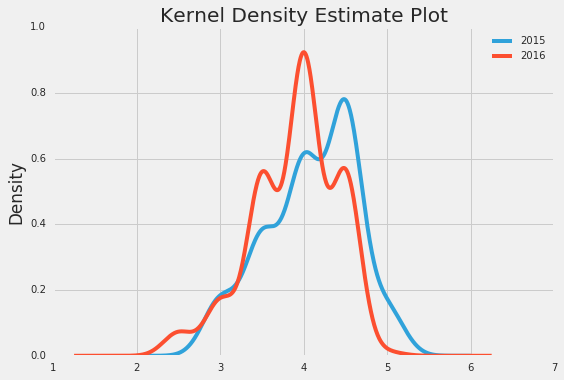

In [21]:
plt.style.use('fivethirtyeight')
col_2015_n['Fandango_Stars'].plot.kde(label='2015')
col_new_n['fandango'].plot.kde(label='2016')

plt.title('Kernel Density Estimate Plot')
plt.legend()
plt.show()

The 2015 data is negatively skewed while the 2016 data is more of Guassian distribution. This suggests that there has been a difference in the ratings reported for popular movies in Fandago and since the move of the KDE plots is towards the left, one can assume that the balancing is due to less rating values. 

### Comparing Relative Frequencies

In [36]:
col_2015_n['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [35]:
col_new_n['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Since the number of entries of the two ratings are are different, it would be best to normalize the frequency and compare them as percentages. Looking at the frequency shows that in 2016, there is lower percentage of the popular movies that were rated 5 stars and likewise the percentage of 4.5 ratings also lowered.  

### Determining the Direction of Change

In [46]:
x_2015 = col_2015_n['Fandango_Stars'].mean()
y_2015 = col_2015_n['Fandango_Stars'].mode()[0]
z_2015 = col_2015_n['Fandango_Stars'].median()

In [47]:
x_2016 = col_new_n['fandango'].mean()
y_2016 = col_new_n['fandango'].mode()[0]
z_2016 = col_new_n['fandango'].median()

In [49]:
summary = pd.DataFrame()
summary['2015'] = [x_2015, z_2015, y_2015]
summary['2016'] = [x_2016, z_2016, y_2016]
summary.index = ['mean', 'median', 'mode']

summary

2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000

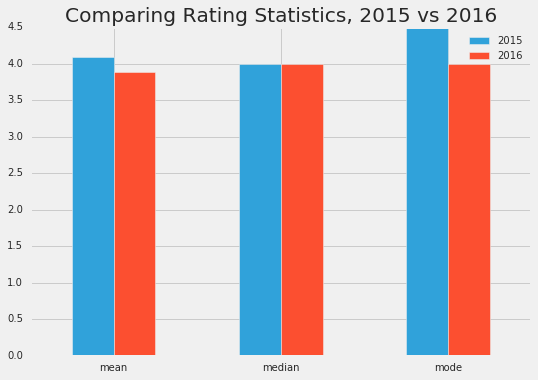

In [56]:
summary.plot.bar()
plt.xticks(rotation=360)
plt.title('Comparing Rating Statistics, 2015 vs 2016')

Graphically, it is more pronounced that the 2015 ratings had greater mean than 2016's and also the mode for 2015 was 4.5 while that of 2016 was 4.0. This implies that a greater number of 4.5 ratings were recorded in 2015 compared to 2016.